In [2]:
# IMPORTAÇÃO DE BLIBLIOTECAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df_consultas = pd.read_csv('consultas.csv')
df_avaliacoes = pd.read_csv('avaliacoes.csv')
df_clinicas = pd.read_csv('clinicas.csv')
df_medicos = pd.read_csv('medicos.csv')
df_pacientes = pd.read_csv('pacientes.csv')


In [65]:
# Convertendo colunas de data/hora para datetime
df_consultas['data_hora_agendada'] = pd.to_datetime(df_consultas['data_hora_agendada'])
df_consultas['data_hora_inicio'] = pd.to_datetime(df_consultas['data_hora_inicio'])

# Calculando tempo de espera em minutos
df_consultas['tempo_espera'] = (df_consultas['data_hora_inicio'] - df_consultas['data_hora_agendada']).dt.total_seconds() / 60
df_consultas

df_consultas.to_csv("df_consultas.csv", index=False, encoding="utf-8-sig", decimal=",")

In [66]:
df_consultas

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
0,1,82,15,4,Cardiologia,2023-09-27 23:46:00,2023-09-28 00:16:00,Realizada,30.0
1,2,18,95,14,Cardiologia,2023-09-04 09:05:00,2023-09-04 13:05:00,Realizada,240.0
2,3,55,5,4,Pediatria,2023-02-04 02:43:00,2023-02-04 02:58:00,Realizada,15.0
3,4,78,4,72,Ortopedia,2023-03-14 09:28:00,2023-03-14 13:28:00,Realizada,240.0
4,5,58,76,36,Pediatria,2023-10-22 16:54:00,2023-10-22 16:54:00,Cancelada,0.0
...,...,...,...,...,...,...,...,...,...
4995,4996,27,27,93,Pediatria,2023-03-28 04:34:00,2023-03-28 05:34:00,Cancelada,60.0
4996,4997,17,26,8,Cardiologia,2023-12-06 12:39:00,2023-12-06 12:54:00,Realizada,15.0
4997,4998,60,39,34,Ortopedia,2023-11-06 11:27:00,2023-11-06 11:27:00,Realizada,0.0
4998,4999,65,7,98,Dermatologia,2023-10-07 20:19:00,2023-10-07 22:19:00,Realizada,120.0


In [19]:
tempo_especialidade =df_consultas.sort_values(by= 'especialidade', ascending= False)
media_tempo_especialidade= tempo_especialidade.groupby(['especialidade'])[['tempo_espera']].mean().reset_index()
media_tempo_especialidade

,especialidade,tempo_espera
0,Cardiologia,96.148649
1,Dermatologia,97.584830
2,Ginecologia,95.841523
3,Neurologia,100.522727
4,Ortopedia,94.038634
5,Pediatria,93.013699


In [38]:
tempo_especialidade1 = tempo_especialidade[['especialidade', 'tempo_espera' ]]
array_especialidade = np.array(tempo_especialidade1['tempo_espera'])
q1, q2, q3 = np.percentile(array_especialidade, [25, 50, 75])
media = np.mean(array_especialidade)
mediana = np.median(array_especialidade)
distancia = (media - mediana) / mediana
iqr = q3 - q1
limite_inf, limite_sup = q1 - 1.5 * iqr, q3 + 1.5 * iqr
outliers = (array_especialidade < limite_inf) | (array_especialidade > limite_sup)
print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}, Média: {media}, Mediana: {mediana}, Distância %: {(distancia * 100):.2f}%, Outliers: {outliers.sum()}")



Q1: 10.0, Q2: 30.0, Q3: 180.0, Média: 95.517, Mediana: 30.0, Distância %: 218.39%, Outliers: 0


In [52]:
tempo_especialidade = df_consultas.sort_values(by= 'especialidade', ascending= False)
media_tempo_especialidade = tempo_especialidade.groupby(['especialidade'])[['tempo_espera']].mean().reset_index()
mediana_tempo_especialidade = tempo_especialidade.groupby(['especialidade'])[['tempo_espera']].median().reset_index()

tempo_medico = df_consultas.sort_values(by= 'id_medico', ascending= False)
media_tempo_medico = tempo_medico.groupby(['id_medico'])[['tempo_espera']].mean().reset_index()
mediana_tempo_medico = tempo_medico.groupby(['id_medico'])[['tempo_espera']].median().reset_index()

tempo_clinica = df_consultas.sort_values(by= 'id_clinica', ascending= False)
media_tempo_clinica = tempo_clinica.groupby(['id_clinica'])[['tempo_espera']].mean().reset_index()
mediana_tempo_clinica = tempo_clinica.groupby(['id_clinica'])[['tempo_espera']].median().reset_index()

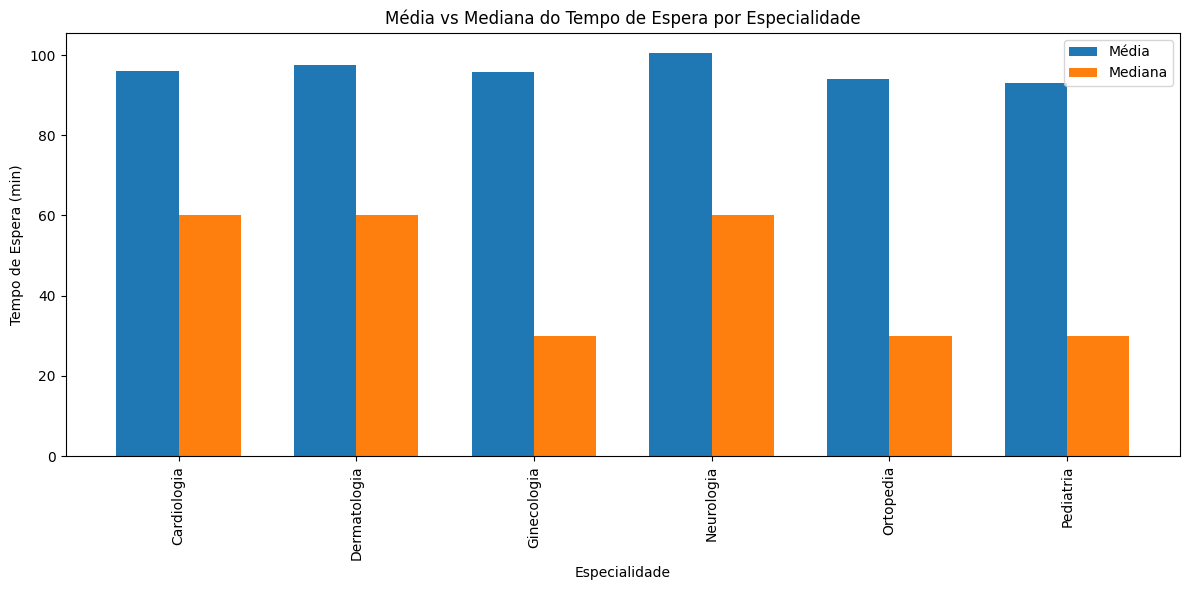

In [50]:
# Mescla os dois DataFrames por 'especialidade'
df_esp = media_tempo_especialidade.merge(
    mediana_tempo_especialidade, 
    on='especialidade', 
    suffixes=('_media', '_mediana')
)

# Cria gráfico
x = df_esp['especialidade']
x_indices = range(len(x))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x_indices, df_esp['tempo_espera_media'], width=width, label='Média')
plt.bar([i + width for i in x_indices], df_esp['tempo_espera_mediana'], width=width, label='Mediana')

plt.xticks([i + width / 2 for i in x_indices], x, rotation=90)
plt.xlabel('Especialidade')
plt.ylabel('Tempo de Espera (min)')
plt.title('Média vs Mediana do Tempo de Espera por Especialidade')
plt.legend()
plt.tight_layout()
plt.show()

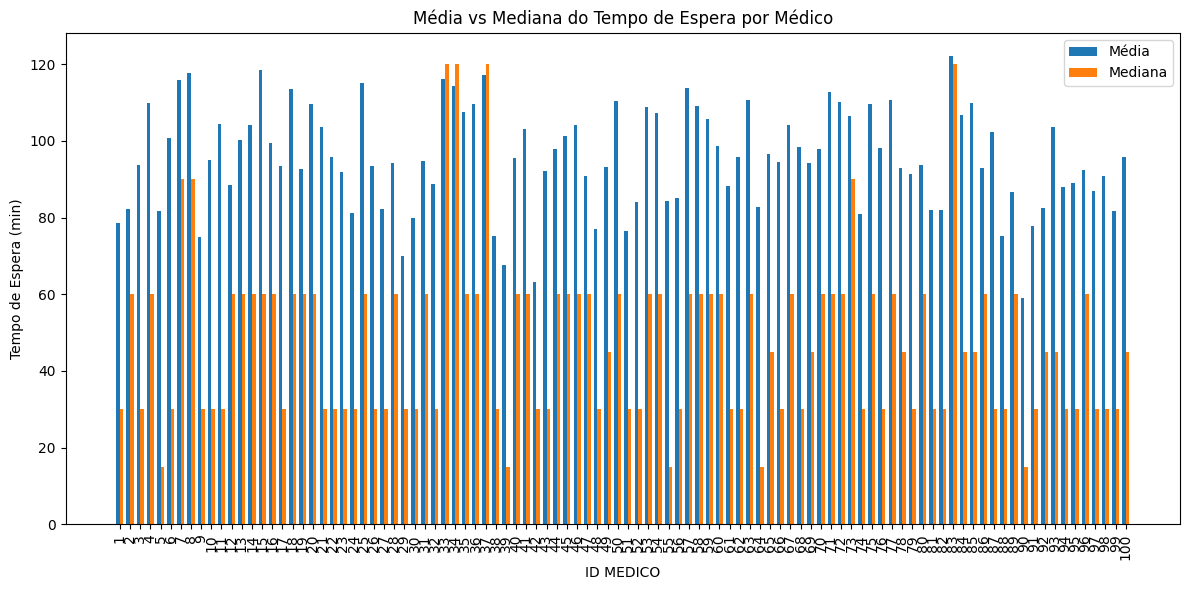

In [51]:
# Mescla os dois DataFrames por 'especialidade'
df_med = media_tempo_medico.merge(
    mediana_tempo_medico, 
    on='id_medico', 
    suffixes=('_media', '_mediana')
)

# Cria gráfico
x = df_med['id_medico']
x_indices = range(len(x))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x_indices, df_med['tempo_espera_media'], width=width, label='Média')
plt.bar([i + width for i in x_indices], df_med['tempo_espera_mediana'], width=width, label='Mediana')

plt.xticks([i + width / 2 for i in x_indices], x, rotation=90)
plt.xlabel('ID MEDICO')
plt.ylabel('Tempo de Espera (min)')
plt.title('Média vs Mediana do Tempo de Espera por Médico')
plt.legend()
plt.tight_layout()
plt.show()

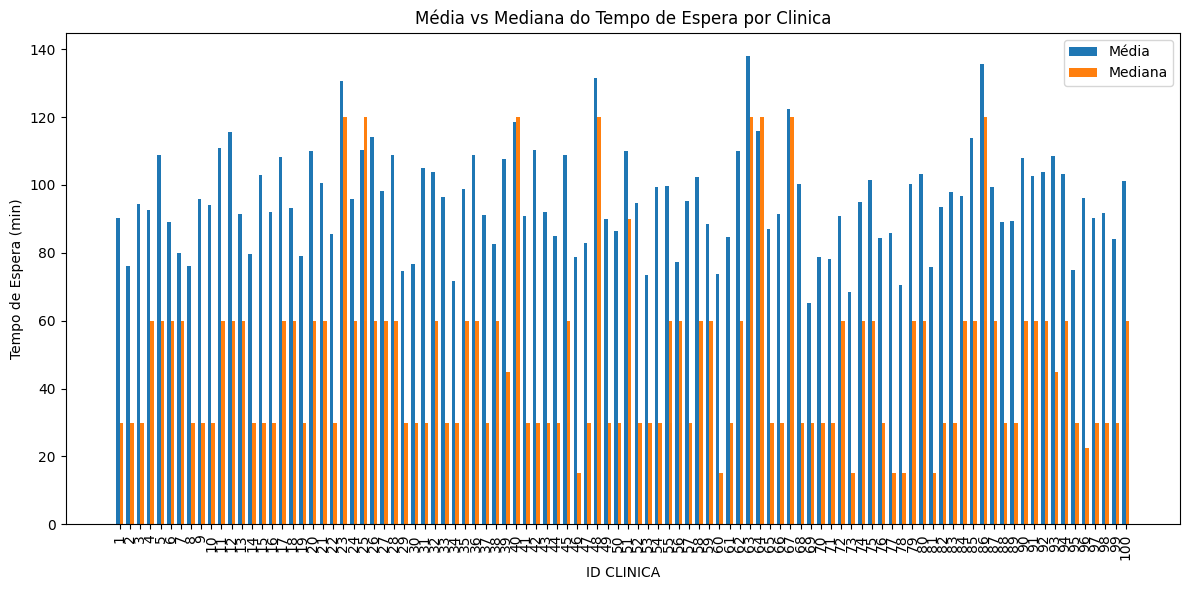

In [53]:
# Mescla os dois DataFrames por 'especialidade'
df_cli = media_tempo_clinica.merge(
    mediana_tempo_clinica, 
    on='id_clinica', 
    suffixes=('_media', '_mediana')
)

# Cria gráfico
x = df_cli['id_clinica']
x_indices = range(len(x))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x_indices, df_cli['tempo_espera_media'], width=width, label='Média')
plt.bar([i + width for i in x_indices], df_cli['tempo_espera_mediana'], width=width, label='Mediana')

plt.xticks([i + width / 2 for i in x_indices], x, rotation=90)
plt.xlabel('ID CLINICA')
plt.ylabel('Tempo de Espera (min)')
plt.title('Média vs Mediana do Tempo de Espera por Clinica')
plt.legend()
plt.tight_layout()
plt.show()

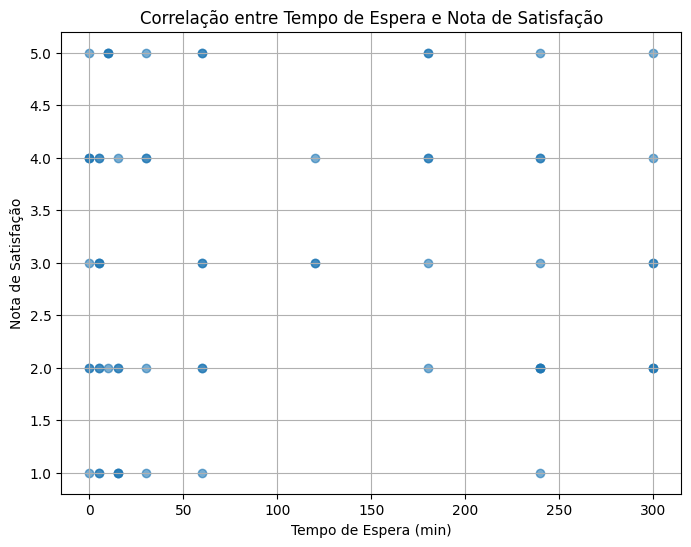

Correlação: 0.05


In [62]:
# JUNTANDO DATAFRAMES A PARTIR DO "ID CONSULTA"
df_correlacao = df_consultas.merge(df_avaliacoes, on='id_consulta')

# FILTRA LINHA APENAS COM TEMPO DE ESPERA VALIDO
df_correlacao = df_correlacao[df_correlacao['tempo_espera'].notnull()]
df_correlacao = df_correlacao.loc[df_correlacao['status'] == 'Realizada']

# Tempo de Espera x Nota de Satisfação
plt.figure(figsize=(8, 6))
plt.scatter(df_correlacao['tempo_espera'], df_correlacao['nota_satisfacao'], alpha=0.6)
plt.xlabel('Tempo de Espera (min)')
plt.ylabel('Nota de Satisfação')
plt.title('Correlação entre Tempo de Espera e Nota de Satisfação')
plt.grid(True)
plt.show()

# CORRELAÇÃO NUMÉRICA
correlacao = df_correlacao['tempo_espera'].corr(df_correlacao['nota_satisfacao'])
print(f'Correlação: {correlacao:.2f}')


<function matplotlib.pyplot.show(close=None, block=None)>

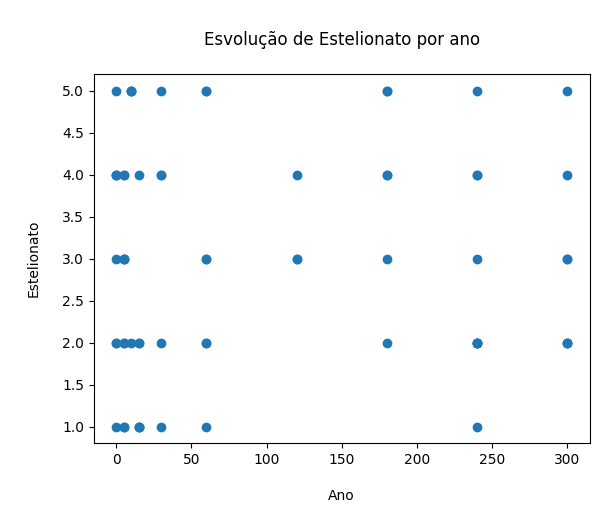

In [64]:
plt.scatter(df_correlacao['tempo_espera'], df_correlacao['nota_satisfacao'])
plt.xlabel('\nAno\n') 
plt.ylabel('\nEstelionato\n')
plt.title('\nEsvolução de Estelionato por ano\n')
plt.show

In [63]:
df_correlacao

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera,nota_satisfacao,comentario
0,9,69,16,49,Ortopedia,2023-01-29 16:33:00,2023-01-29 20:33:00,Realizada,240.0,4,Comentário 3
4,85,34,23,75,Ortopedia,2023-04-07 15:40:00,2023-04-07 15:40:00,Realizada,0.0,1,Comentário 97
5,231,80,72,42,Pediatria,2023-11-30 05:37:00,2023-11-30 10:37:00,Realizada,300.0,2,Comentário 60
8,372,51,92,93,Ginecologia,2023-06-24 06:38:00,2023-06-24 10:38:00,Realizada,240.0,4,Comentário 50
10,411,34,84,100,Ginecologia,2023-07-30 14:47:00,2023-07-30 19:47:00,Realizada,300.0,2,Comentário 35
...,...,...,...,...,...,...,...,...,...,...,...
95,4743,79,71,42,Neurologia,2023-02-09 14:03:00,2023-02-09 19:03:00,Realizada,300.0,5,Comentário 14
96,4874,52,88,93,Ortopedia,2023-06-11 05:05:00,2023-06-11 05:05:00,Realizada,0.0,5,Comentário 29
97,4880,99,27,99,Pediatria,2023-10-20 19:55:00,2023-10-20 20:10:00,Realizada,15.0,2,Comentário 96
98,4916,85,19,39,Cardiologia,2023-03-01 02:15:00,2023-03-01 03:15:00,Realizada,60.0,2,Comentário 44
